# **Classification garbage**

- **NOTE:** This notebook was executed on Google Colab

In [1]:
from IPython.display import display, Image
from IPython import display

#### **1. Data labelling**

- We first observed the labelled images in the train set to familiarize with the data
- We then tried to classify the unlabelled images in the test set
- Going through each of them, if the target is clear, we move the image to the appropriate folder
- In case of doubt, we ran into an iterative process:
  - Keep the concerned images aside
  - Figure out which ones can be classified correctly with some certainty, considering the number of missing samples in each group
  - Add the selected images to the target folders
- At a certain point we had a great challenge with 6 confusing images :
  - 3 were considered clean: `WhatsApp Image 2020-05-18 at 11.57.03 AM (5).jpeg`, `WhatsApp Image 2021-01-29 at 6.23.22 PM.jpeg`, and `WhatsApp Image 2020-08-21 at 9.54.56 AM (4).jpeg`
  - 3 were considered dirty: `00569_03.jpg`, `00594_00.jpg`, and `01300_00.jpg`
  - In a real use case, we would have discussed with different people to validate this entire labeling process
- The file names of the classified images are saved in txt files: `test/clean/clean.txt`, and `test/dirty/dirty.txt`

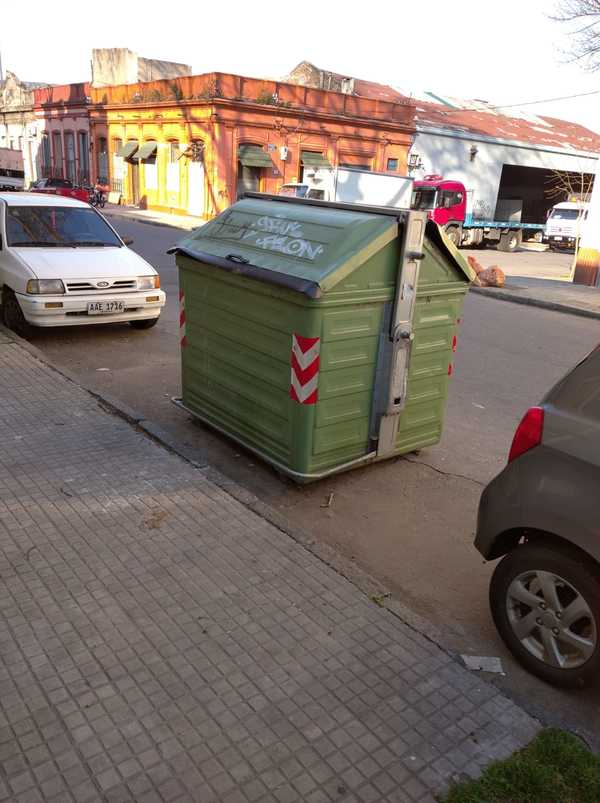

In [2]:
# A clean garbage
Image(filename="/content/drive/MyDrive/labelled_data/train/clean/0e02598e-acbb-423e-912e-cf2b922b5bd7.jpeg", width=300)

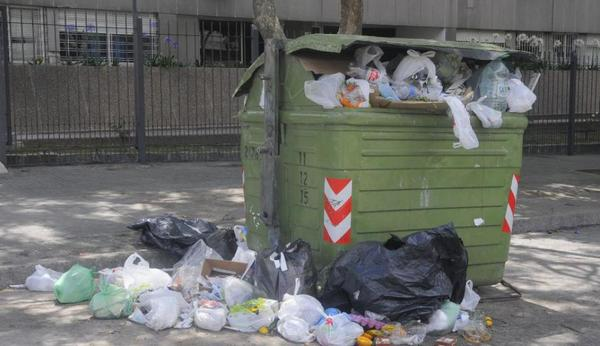

In [3]:
# A dirty garbage
Image(filename="/content/drive/MyDrive/labelled_data/train/dirty/59b578137fcbe.jpeg", width=300)

#### **2. Train a classification model on the data**

- **Data**
  - We have 2 classes: `clean` and `dirty`
  - FOR EACH of them, we have the following splits:
    -  `train`:
       -  20 labelled samples
       -  280 unlabelled samples
    -  `test`: 100 unlabelled samples, we labelled them -> finally, we didn't use this data in this project
   -  The 280 unlabelled samples were all labelled and exploited this way:
      -  20 samples were picked for the validation set to asses the model's performance during training
      -  30 samples were added to the train set to provide more data to the model during training
      -  The rest (230) constituted a sort of inference test to simulate a real-world deployment with feedback (since we have the real labels)
   -  As previously said, some images were very hard to classify visually, this work assumes we have correctly identified the labels
   -  For reproducibility, the classified images file names are saved in text files: `train|val|test|inference/clean|dirty.txt`
-  **Model**
   - We are going to train a YOLO model (v11) from [Ultralytics](https://docs.ultralytics.com/) on a classification task
   - It achieves state-of-the-art performance accros multiple tasks
   - Generally, the images don't need any prior manual processing
- **Evaluation**
  - We expect to achieve a high score on the binary classification metrics (accuracy, precision, and recall)
  - In this use case, we assume that a "dirty" prediction on an image will alert a garbage collector to remove the dirt
  - Therefore, we think it's more suitable to trigger some false alarms ("clean" garbage predicted as "dirty"), than missing a really full garbage can ("dirty" classified as "clean")

In [4]:
# Install ultralytics to use YOLO
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.9/906.9 kB 15.6 MB/s eta 0:00:00


In [5]:
# Import YOLO
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
# Load a pretrained classification model (medium size)
model = YOLO("yolov8m-cls.pt")

# Train the model
model.train(
    data="/content/drive/MyDrive/labelled_data",
    batch=16, seed=42, close_mosaic=0, lr0=0.01,
)

100%|██████████| 32.7M/32.7M [00:00<00:00, 165MB/s]


Ultralytics 8.3.61 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8m-cls.pt, data=/content/drive/MyDrive/labelled_data, epochs=100, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

100%|██████████| 5.35M/5.35M [00:00<00:00, 65.4MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/labelled_data/train... 100 images, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
val: Scanning /content/drive/MyDrive/labelled_data/val... 40 images, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 38 weight(decay=0.0), 39 weight(decay=0.0005), 39 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100     0.862G     0.7361         16        224:  14%|█▍        | 1/7 [00:03<00:18,  3.07s/it]


100%|██████████| 755k/755k [00:00<00:00, 16.6MB/s]
      1/100     0.971G     0.7249          4        224: 100%|██████████| 7/7 [00:12<00:00,  1.77s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00,  6.07it/s]

                   all       0.55          1



      Epoch    GPU_mem       loss  Instances       Size


      2/100     0.956G     0.6708          4        224: 100%|██████████| 7/7 [00:01<00:00,  6.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.72it/s]

                   all      0.725          1



      Epoch    GPU_mem       loss  Instances       Size


      3/100     0.927G      0.599          4        224: 100%|██████████| 7/7 [00:02<00:00,  3.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.31it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


      4/100      0.95G     0.5284          4        224: 100%|██████████| 7/7 [00:01<00:00,  3.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00,  9.63it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


      5/100     0.969G     0.4683          4        224: 100%|██████████| 7/7 [00:02<00:00,  3.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.91it/s]

                   all       0.85          1



      Epoch    GPU_mem       loss  Instances       Size


      6/100     0.963G      0.434          4        224: 100%|██████████| 7/7 [00:01<00:00,  5.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.52it/s]

                   all       0.85          1



      Epoch    GPU_mem       loss  Instances       Size


      7/100      0.99G     0.3178          4        224: 100%|██████████| 7/7 [00:01<00:00,  4.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.72it/s]

                   all       0.85          1



      Epoch    GPU_mem       loss  Instances       Size


      8/100     0.931G     0.2381          4        224: 100%|██████████| 7/7 [00:02<00:00,  2.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 32.96it/s]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


      9/100     0.979G     0.1992          4        224: 100%|██████████| 7/7 [00:01<00:00,  5.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.14it/s]

                   all      0.925          1



      Epoch    GPU_mem       loss  Instances       Size


     10/100     0.944G     0.1715          4        224: 100%|██████████| 7/7 [00:01<00:00,  4.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 26.88it/s]

                   all      0.925          1



      Epoch    GPU_mem       loss  Instances       Size


     11/100     0.994G     0.1069          4        224: 100%|██████████| 7/7 [00:01<00:00,  3.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00,  9.93it/s]

                   all      0.925          1



      Epoch    GPU_mem       loss  Instances       Size


     12/100      0.96G    0.09322          4        224: 100%|██████████| 7/7 [00:02<00:00,  3.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 12.41it/s]

                   all        0.9          1



      Epoch    GPU_mem       loss  Instances       Size


     13/100     0.923G      0.041          4        224: 100%|██████████| 7/7 [00:01<00:00,  5.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 43.90it/s]

                   all        0.9          1



      Epoch    GPU_mem       loss  Instances       Size


     14/100     0.965G    0.07213          4        224: 100%|██████████| 7/7 [00:01<00:00,  4.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 26.65it/s]

                   all      0.925          1



      Epoch    GPU_mem       loss  Instances       Size


     15/100      0.96G    0.05194          4        224: 100%|██████████| 7/7 [00:02<00:00,  3.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.62it/s]

                   all      0.925          1



      Epoch    GPU_mem       loss  Instances       Size


     16/100     0.988G    0.02174          4        224: 100%|██████████| 7/7 [00:01<00:00,  3.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00,  8.83it/s]

                   all        0.9          1



      Epoch    GPU_mem       loss  Instances       Size


     17/100      0.94G     0.1132          4        224: 100%|██████████| 7/7 [00:01<00:00,  4.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.49it/s]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


     18/100     0.958G    0.03363          4        224: 100%|██████████| 7/7 [00:01<00:00,  5.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 30.14it/s]

                   all      0.925          1



      Epoch    GPU_mem       loss  Instances       Size


     19/100     0.967G    0.01115          4        224: 100%|██████████| 7/7 [00:01<00:00,  3.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 10.41it/s]

                   all      0.925          1



      Epoch    GPU_mem       loss  Instances       Size


     20/100     0.965G    0.02579          4        224: 100%|██████████| 7/7 [00:02<00:00,  3.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.10it/s]

                   all      0.925          1



      Epoch    GPU_mem       loss  Instances       Size


     21/100     0.948G    0.06432          4        224: 100%|██████████| 7/7 [00:01<00:00,  4.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.63it/s]

                   all      0.925          1



      Epoch    GPU_mem       loss  Instances       Size


     22/100     0.973G     0.0577          4        224: 100%|██████████| 7/7 [00:01<00:00,  4.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 35.76it/s]

                   all      0.925          1



      Epoch    GPU_mem       loss  Instances       Size


     23/100     0.954G    0.03671          4        224: 100%|██████████| 7/7 [00:02<00:00,  2.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 31.07it/s]

                   all      0.925          1



      Epoch    GPU_mem       loss  Instances       Size


     24/100     0.994G    0.08102          4        224: 100%|██████████| 7/7 [00:02<00:00,  2.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 30.22it/s]

                   all      0.925          1



      Epoch    GPU_mem       loss  Instances       Size


     25/100     0.942G    0.03409          4        224: 100%|██████████| 7/7 [00:01<00:00,  4.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 12.21it/s]


                   all      0.925          1

      Epoch    GPU_mem       loss  Instances       Size


     26/100     0.958G    0.01327          4        224: 100%|██████████| 7/7 [00:01<00:00,  4.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.72it/s]


                   all      0.925          1

      Epoch    GPU_mem       loss  Instances       Size


     27/100     0.969G    0.03668          4        224: 100%|██████████| 7/7 [00:01<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.03it/s]

                   all      0.925          1



      Epoch    GPU_mem       loss  Instances       Size


     28/100     0.992G     0.1421          4        224: 100%|██████████| 7/7 [00:02<00:00,  3.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 28.97it/s]

                   all        0.9          1



      Epoch    GPU_mem       loss  Instances       Size


     29/100     0.929G    0.09489          4        224: 100%|██████████| 7/7 [00:01<00:00,  4.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.32it/s]

                   all        0.9          1



      Epoch    GPU_mem       loss  Instances       Size


     30/100     0.963G     0.0293          4        224: 100%|██████████| 7/7 [00:01<00:00,  4.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.99it/s]

                   all      0.925          1



      Epoch    GPU_mem       loss  Instances       Size


     31/100     0.965G    0.03386          4        224: 100%|██████████| 7/7 [00:01<00:00,  3.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 31.21it/s]

                   all       0.95          1



      Epoch    GPU_mem       loss  Instances       Size


     32/100     0.994G    0.08399          4        224: 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 11.07it/s]

                   all      0.925          1



      Epoch    GPU_mem       loss  Instances       Size


     33/100     0.921G    0.07547          4        224: 100%|██████████| 7/7 [00:01<00:00,  4.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.63it/s]

                   all       0.95          1



      Epoch    GPU_mem       loss  Instances       Size


     34/100      0.96G    0.03096          4        224: 100%|██████████| 7/7 [00:01<00:00,  4.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.39it/s]

                   all       0.95          1



      Epoch    GPU_mem       loss  Instances       Size


     35/100     0.954G    0.02625          4        224: 100%|██████████| 7/7 [00:01<00:00,  4.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 12.21it/s]

                   all       0.95          1



      Epoch    GPU_mem       loss  Instances       Size


     36/100      0.96G        0.2          4        224: 100%|██████████| 7/7 [00:02<00:00,  3.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 11.36it/s]

                   all       0.95          1



      Epoch    GPU_mem       loss  Instances       Size


     37/100     0.929G    0.05856          4        224: 100%|██████████| 7/7 [00:01<00:00,  6.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.74it/s]

                   all       0.95          1



      Epoch    GPU_mem       loss  Instances       Size


     38/100     0.971G     0.0171          4        224: 100%|██████████| 7/7 [00:00<00:00,  7.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.23it/s]

                   all       0.95          1



      Epoch    GPU_mem       loss  Instances       Size


     39/100     0.956G    0.06734          4        224: 100%|██████████| 7/7 [00:01<00:00,  4.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.52it/s]

                   all      0.925          1



      Epoch    GPU_mem       loss  Instances       Size


     40/100     0.963G   0.009274          4        224: 100%|██████████| 7/7 [00:02<00:00,  2.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.07it/s]

                   all      0.925          1



      Epoch    GPU_mem       loss  Instances       Size


     41/100      0.94G    0.01684          4        224: 100%|██████████| 7/7 [00:01<00:00,  4.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 26.63it/s]

                   all        0.9          1



      Epoch    GPU_mem       loss  Instances       Size


     42/100     0.971G    0.05449          4        224: 100%|██████████| 7/7 [00:01<00:00,  3.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 33.96it/s]

                   all       0.85          1



      Epoch    GPU_mem       loss  Instances       Size


     43/100     0.969G    0.04021          4        224: 100%|██████████| 7/7 [00:01<00:00,  4.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 10.75it/s]

                   all      0.825          1



      Epoch    GPU_mem       loss  Instances       Size


     44/100     0.994G    0.05758          4        224: 100%|██████████| 7/7 [00:02<00:00,  3.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 11.32it/s]

                   all      0.825          1



      Epoch    GPU_mem       loss  Instances       Size


     45/100     0.935G    0.01996          4        224: 100%|██████████| 7/7 [00:01<00:00,  4.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 35.58it/s]

                   all      0.825          1



      Epoch    GPU_mem       loss  Instances       Size


     46/100     0.958G     0.1826          4        224: 100%|██████████| 7/7 [00:01<00:00,  4.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.04it/s]

                   all      0.825          1



      Epoch    GPU_mem       loss  Instances       Size


     47/100     0.971G     0.0193          4        224: 100%|██████████| 7/7 [00:01<00:00,  4.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.31it/s]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


     48/100     0.998G    0.03504          4        224: 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 10.45it/s]


                   all      0.875          1

      Epoch    GPU_mem       loss  Instances       Size


     49/100      0.94G    0.02239          4        224: 100%|██████████| 7/7 [00:01<00:00,  5.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.51it/s]


                   all      0.875          1

      Epoch    GPU_mem       loss  Instances       Size


     50/100      0.96G    0.03268          4        224: 100%|██████████| 7/7 [00:01<00:00,  4.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 42.58it/s]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


     51/100     0.967G    0.01418          4        224: 100%|██████████| 7/7 [00:01<00:00,  3.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 26.22it/s]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


     52/100      0.96G    0.04219          4        224: 100%|██████████| 7/7 [00:02<00:00,  3.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.37it/s]

                   all        0.9          1



      Epoch    GPU_mem       loss  Instances       Size


     53/100     0.931G    0.02065          4        224: 100%|██████████| 7/7 [00:01<00:00,  4.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 36.29it/s]

                   all        0.9          1



      Epoch    GPU_mem       loss  Instances       Size


     54/100     0.958G   0.009392          4        224: 100%|██████████| 7/7 [00:01<00:00,  4.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.82it/s]

                   all      0.925          1



      Epoch    GPU_mem       loss  Instances       Size


     55/100     0.971G     0.1645          4        224: 100%|██████████| 7/7 [00:01<00:00,  4.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 40.16it/s]

                   all        0.9          1



      Epoch    GPU_mem       loss  Instances       Size


     56/100      0.99G    0.04468          4        224: 100%|██████████| 7/7 [00:02<00:00,  2.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 33.15it/s]

                   all        0.9          1



      Epoch    GPU_mem       loss  Instances       Size


     57/100     0.929G    0.04371          4        224: 100%|██████████| 7/7 [00:02<00:00,  2.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 28.10it/s]

                   all        0.9          1



      Epoch    GPU_mem       loss  Instances       Size


     58/100     0.956G    0.01094          4        224: 100%|██████████| 7/7 [00:01<00:00,  3.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 28.52it/s]

                   all        0.9          1



      Epoch    GPU_mem       loss  Instances       Size


     59/100      0.96G    0.02625          4        224: 100%|██████████| 7/7 [00:01<00:00,  4.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 26.14it/s]


                   all        0.9          1

      Epoch    GPU_mem       loss  Instances       Size


     60/100         1G     0.2339          4        224: 100%|██████████| 7/7 [00:02<00:00,  3.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.48it/s]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


     61/100     0.942G     0.0222          4        224: 100%|██████████| 7/7 [00:02<00:00,  2.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.26it/s]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


     62/100     0.958G    0.05096          4        224: 100%|██████████| 7/7 [00:01<00:00,  4.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.08it/s]

                   all        0.9          1



      Epoch    GPU_mem       loss  Instances       Size


     63/100     0.954G    0.02601          4        224: 100%|██████████| 7/7 [00:01<00:00,  4.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.67it/s]

                   all        0.9          1



      Epoch    GPU_mem       loss  Instances       Size


     64/100     0.963G    0.02534          4        224: 100%|██████████| 7/7 [00:01<00:00,  3.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.63it/s]


                   all      0.875          1

      Epoch    GPU_mem       loss  Instances       Size


     65/100     0.929G    0.02047          4        224: 100%|██████████| 7/7 [00:02<00:00,  2.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 12.13it/s]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


     66/100     0.965G    0.09911          4        224: 100%|██████████| 7/7 [00:01<00:00,  5.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 33.18it/s]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


     67/100      0.96G    0.01017          4        224: 100%|██████████| 7/7 [00:01<00:00,  4.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.17it/s]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


     68/100     0.963G    0.02831          4        224: 100%|██████████| 7/7 [00:01<00:00,  3.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 35.11it/s]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


     69/100     0.935G   0.004792          4        224: 100%|██████████| 7/7 [00:03<00:00,  2.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 11.02it/s]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


     70/100     0.977G    0.00915          4        224: 100%|██████████| 7/7 [00:01<00:00,  4.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.11it/s]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


     71/100     0.973G    0.01647          4        224: 100%|██████████| 7/7 [00:01<00:00,  4.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.98it/s]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


     72/100     0.958G    0.02588          4        224: 100%|██████████| 7/7 [00:01<00:00,  3.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.04it/s]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


     73/100      0.94G    0.03528          4        224: 100%|██████████| 7/7 [00:02<00:00,  3.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 12.54it/s]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


     74/100     0.956G     0.1892          4        224: 100%|██████████| 7/7 [00:02<00:00,  3.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.38it/s]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


     75/100     0.973G      0.115          4        224: 100%|██████████| 7/7 [00:01<00:00,  4.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.93it/s]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


     76/100     0.998G     0.2558          4        224: 100%|██████████| 7/7 [00:01<00:00,  3.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 27.26it/s]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


     77/100     0.937G   0.007097          4        224: 100%|██████████| 7/7 [00:01<00:00,  3.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 12.59it/s]


                   all      0.875          1

      Epoch    GPU_mem       loss  Instances       Size


     78/100     0.965G   0.009946          4        224: 100%|██████████| 7/7 [00:02<00:00,  2.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.83it/s]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


     79/100     0.967G    0.02203          4        224: 100%|██████████| 7/7 [00:01<00:00,  4.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 36.78it/s]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


     80/100     0.965G    0.01946          4        224: 100%|██████████| 7/7 [00:01<00:00,  4.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.47it/s]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


     81/100      0.95G    0.03313          4        224: 100%|██████████| 7/7 [00:01<00:00,  3.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 12.87it/s]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


     82/100     0.971G   0.002311          4        224: 100%|██████████| 7/7 [00:02<00:00,  3.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.33it/s]

                   all        0.9          1



      Epoch    GPU_mem       loss  Instances       Size


     83/100     0.952G   0.007361          4        224: 100%|██████████| 7/7 [00:01<00:00,  5.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.05it/s]


                   all      0.875          1

      Epoch    GPU_mem       loss  Instances       Size


     84/100     0.969G       0.01          4        224: 100%|██████████| 7/7 [00:01<00:00,  4.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.95it/s]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


     85/100     0.937G     0.1915          4        224: 100%|██████████| 7/7 [00:01<00:00,  3.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 11.70it/s]


                   all        0.9          1

      Epoch    GPU_mem       loss  Instances       Size


     86/100     0.977G    0.00625          4        224: 100%|██████████| 7/7 [00:02<00:00,  2.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 10.73it/s]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


     87/100     0.954G     0.0102          4        224: 100%|██████████| 7/7 [00:01<00:00,  3.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.24it/s]

                   all        0.9          1



      Epoch    GPU_mem       loss  Instances       Size


     88/100     0.965G    0.01398          4        224: 100%|██████████| 7/7 [00:01<00:00,  4.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 26.47it/s]

                   all        0.9          1



      Epoch    GPU_mem       loss  Instances       Size


     89/100     0.935G    0.01532          4        224: 100%|██████████| 7/7 [00:01<00:00,  4.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 11.70it/s]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


     90/100     0.963G    0.01459          4        224: 100%|██████████| 7/7 [00:02<00:00,  2.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.82it/s]

                   all        0.9          1



      Epoch    GPU_mem       loss  Instances       Size


     91/100     0.975G   0.009962          4        224: 100%|██████████| 7/7 [00:01<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.83it/s]

                   all        0.9          1



      Epoch    GPU_mem       loss  Instances       Size


     92/100     0.969G    0.02541          4        224: 100%|██████████| 7/7 [00:01<00:00,  4.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.83it/s]

                   all        0.9          1



      Epoch    GPU_mem       loss  Instances       Size


     93/100     0.967G   0.006082          4        224: 100%|██████████| 7/7 [00:01<00:00,  4.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 32.94it/s]

                   all        0.9          1



      Epoch    GPU_mem       loss  Instances       Size


     94/100     0.965G   0.006962          4        224: 100%|██████████| 7/7 [00:02<00:00,  2.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 12.69it/s]

                   all        0.9          1



      Epoch    GPU_mem       loss  Instances       Size


     95/100     0.954G   0.006138          4        224: 100%|██████████| 7/7 [00:01<00:00,  3.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.54it/s]

                   all        0.9          1



      Epoch    GPU_mem       loss  Instances       Size


     96/100         1G    0.01386          4        224: 100%|██████████| 7/7 [00:01<00:00,  5.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 30.75it/s]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


     97/100     0.931G   0.004149          4        224: 100%|██████████| 7/7 [00:01<00:00,  4.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 33.84it/s]

                   all        0.9          1



      Epoch    GPU_mem       loss  Instances       Size


     98/100     0.973G    0.01005          4        224: 100%|██████████| 7/7 [00:03<00:00,  2.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.11it/s]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


     99/100     0.954G   0.004054          4        224: 100%|██████████| 7/7 [00:01<00:00,  3.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.25it/s]


                   all        0.9          1

      Epoch    GPU_mem       loss  Instances       Size


    100/100     0.992G   0.007934          4        224: 100%|██████████| 7/7 [00:01<00:00,  4.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 34.82it/s]

                   all        0.9          1



100 epochs completed in 0.123 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 31.7MB
Optimizer stripped from runs/classify/train/weights/best.pt, 31.7MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.61 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-cls summary (fused): 103 layers, 15,765,218 parameters, 0 gradients, 41.6 GFLOPs
train: /content/drive/MyDrive/labelled_data/train... found 100 images in 2 classes ✅ 
val: /content/drive/MyDrive/labelled_data/val... found 40 images in 2 classes ✅ 
test: /content/drive/MyDrive/labelled_data/test... found 100 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.79it/s]


                   all       0.95          1
Speed: 0.1ms preprocess, 1.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b20a53eb370>
curves: []
curves_results: []
fitness: 0.9749999940395355
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.949999988079071, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9749999940395355}
save_dir: PosixPath('runs/classify/train')
speed: {'preprocess': 0.07755160331726074, 'inference': 1.2106001377105713, 'loss': 0.0006794929504394531, 'postprocess': 0.0016808509826660156}
task: 'classify'
top1: 0.949999988079071
top5: 1.0

#### **3. Evaluation**

In [7]:
import pandas as pd

results = pd.read_csv("/content/runs/classify/train/results.csv")
results.head()

,epoch,time,train/loss,metrics/accuracy_top1,metrics/accuracy_top5,val/loss,lr/pg0,lr/pg1,lr/pg2
0,1,14.6354,0.72486,0.550,1,0.68799,0.000043,0.000043,0.000043
1,2,17.8011,0.67081,0.725,1,0.63672,0.000092,0.000092,0.000092
2,3,22.1351,0.59896,0.750,1,0.56836,0.000140,0.000140,0.000140
3,4,27.4121,0.52841,0.750,1,0.51807,0.000187,0.000187,0.000187
4,5,31.8824,0.46829,0.850,1,0.46362,0.000233,0.000233,0.000233


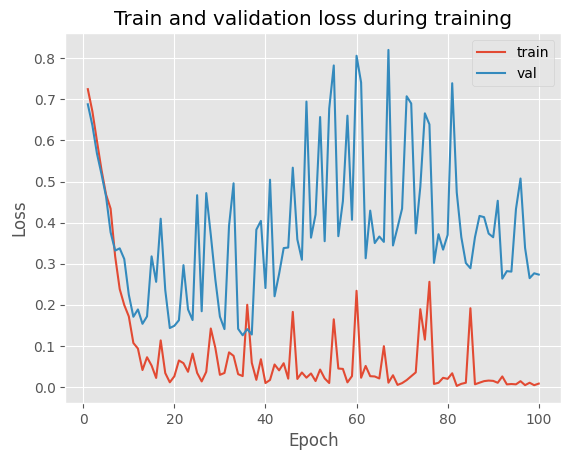

In [8]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

plt.plot(results["epoch"], results["train/loss"], label="train")
plt.plot(results["epoch"], results["val/loss"], label="val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train and validation loss during training")
plt.legend()
plt.show()

- Our training does't get stable over time, maybe the model needs more data? a lower learning rate? something else?
- This model also has an overfitting problem, as can be seen from the remarkable difference between the loss on train and validation* (not test) sets.
- With more time and surely much more work, we could have improved it!

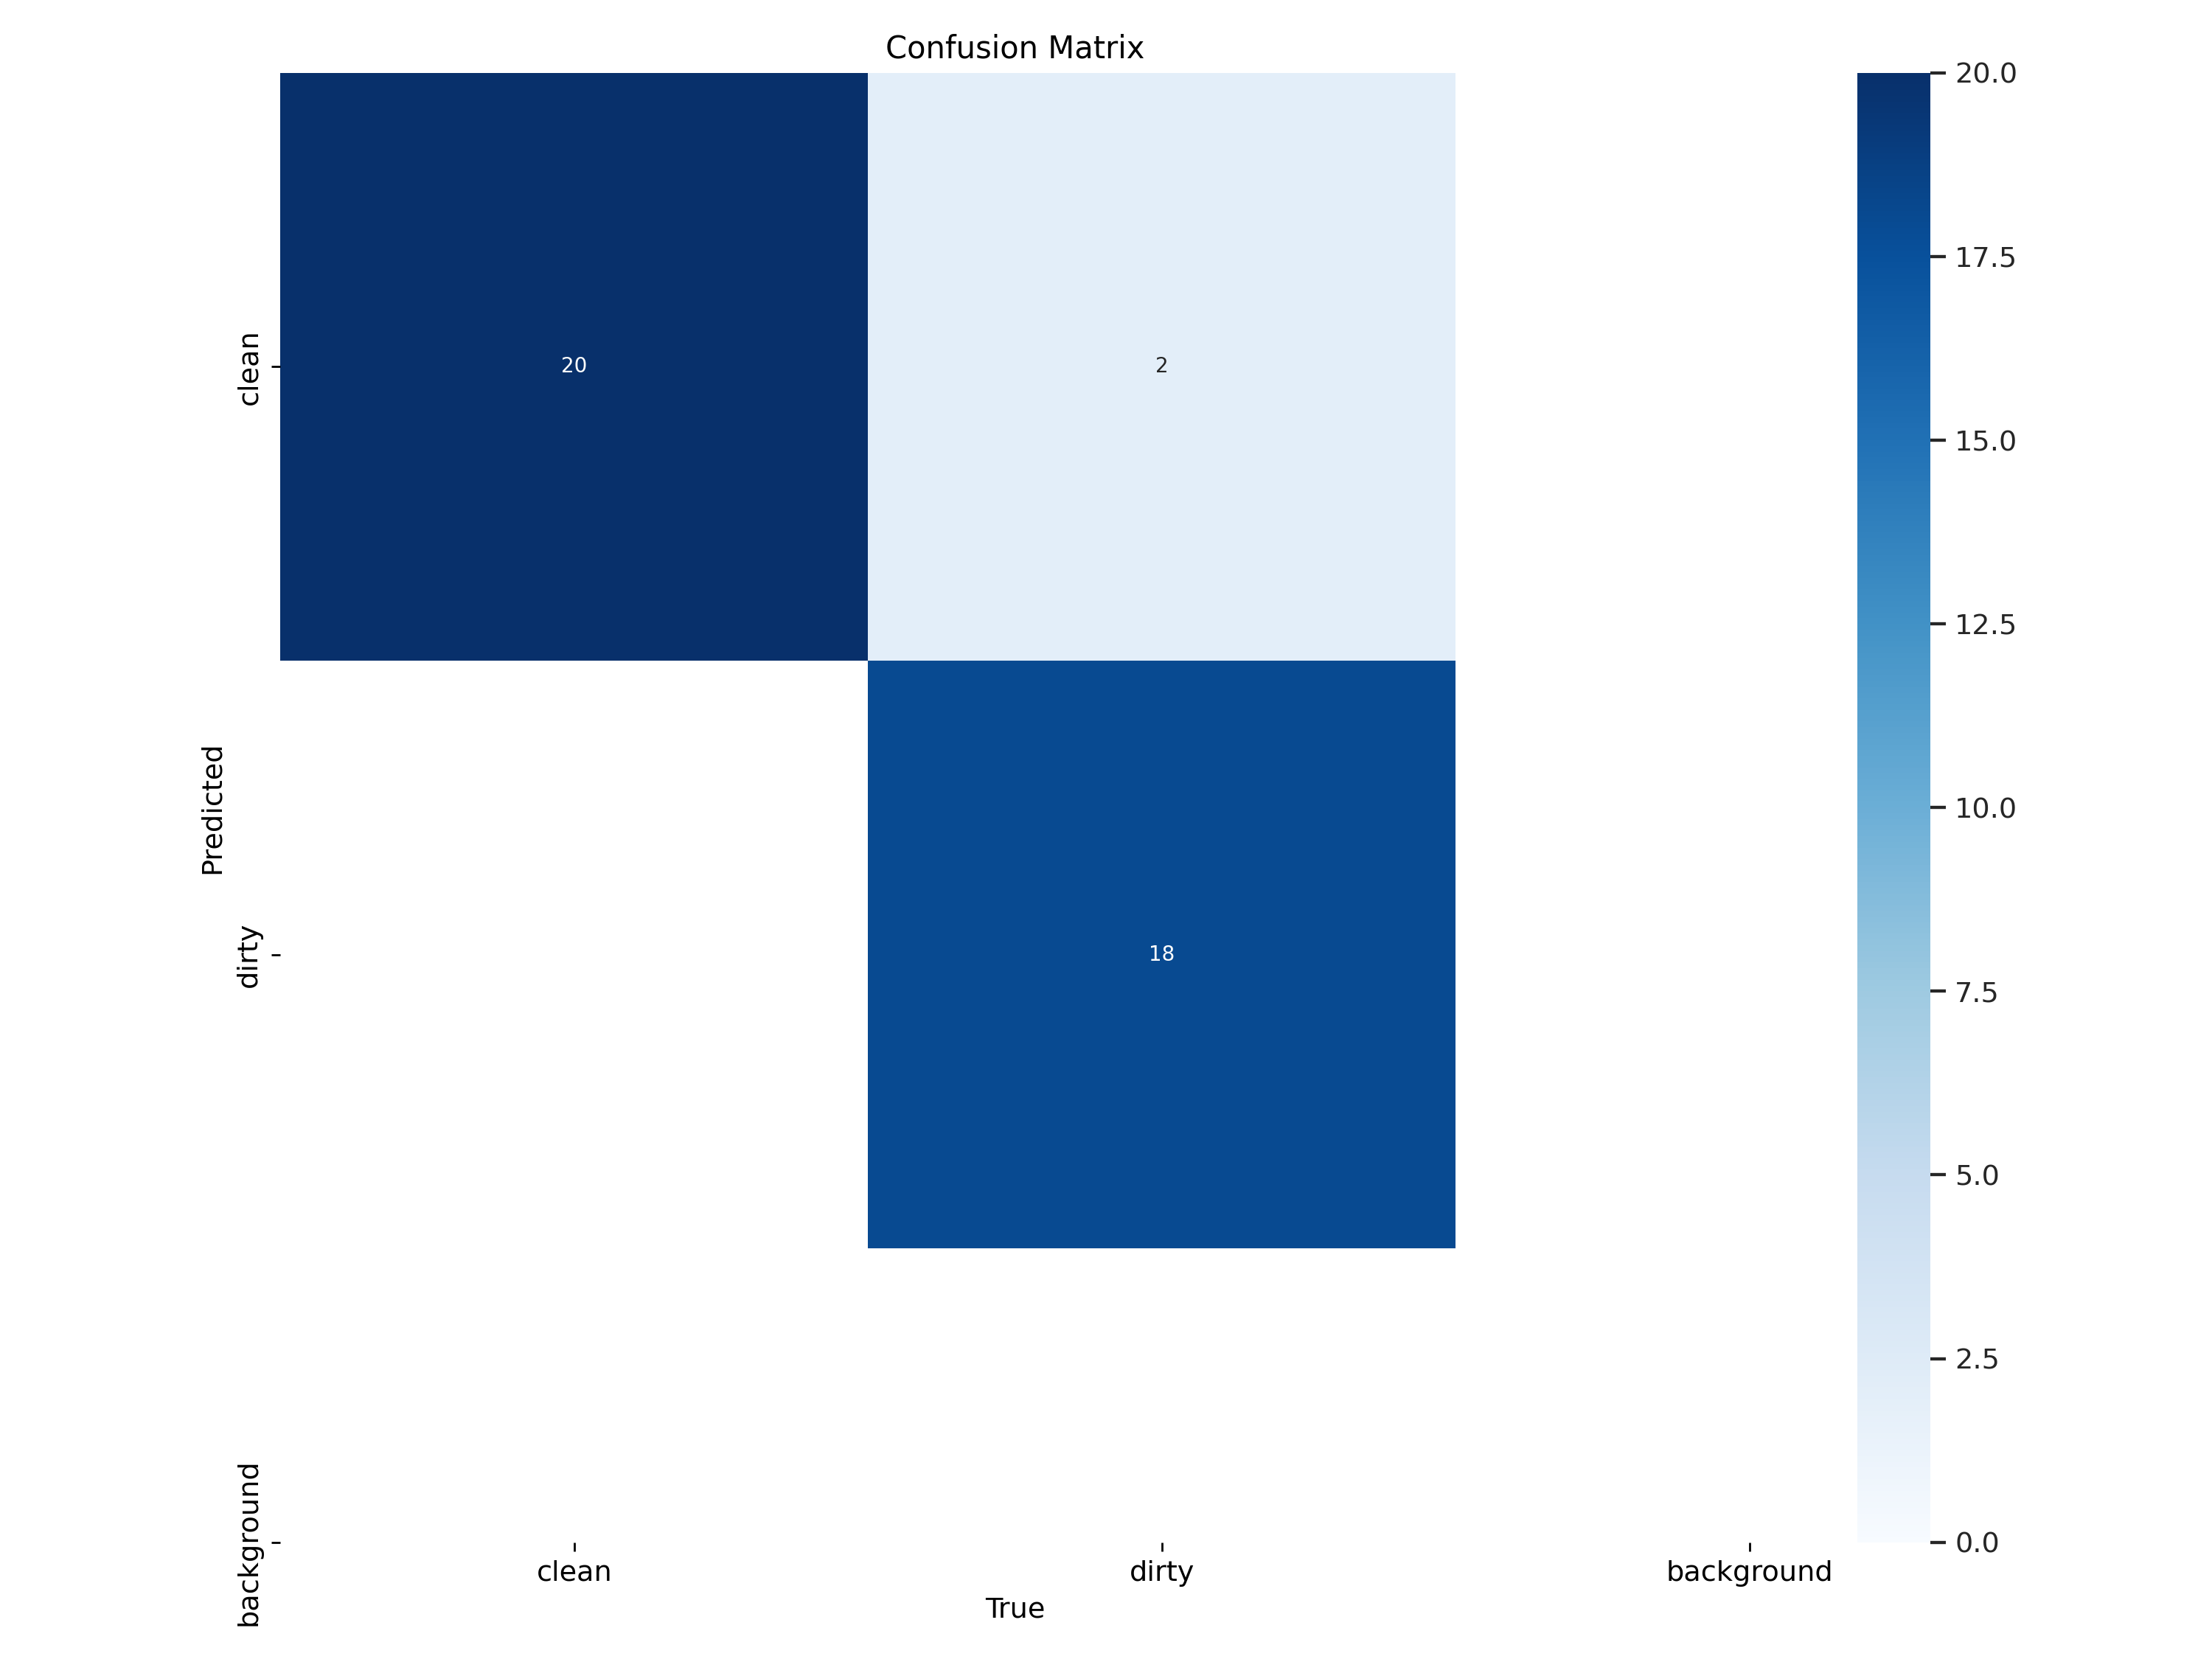

In [9]:
# The confusion matrix on the validation data
Image(filename="/content/runs/classify/train/confusion_matrix.png", width=600)

- The confusion matrix on the validation set shows that the model makes two wrong classifications, dirty garbage cans were predicted as clean (unfortunately what we expected to avoid)

#### **4. Inference**

In [10]:
# Run the trained model on inference (or test) data
inference_clean = model("/content/drive/MyDrive/labelled_data/inference/clean")
inference_dirty = model("/content/drive/MyDrive/labelled_data/inference/dirty")
display.clear_output()

In [11]:
# Map ids to classes
model.names

{0: 'clean', 1: 'dirty'}

In [12]:
# Extract the actual predictions
pred_clean = [model.names[inference_obj.probs.top1] for inference_obj in inference_clean]
pred_dirty = [model.names[inference_obj.probs.top1] for inference_obj in inference_dirty]

In [13]:
# Create a dataset to observe the confusion matrix
predicted = []
predicted.extend(pred_clean)
predicted.extend(pred_dirty)

actual = []
actual.extend(["clean"] * len(pred_clean))
actual.extend(["dirty"] * len(pred_dirty))

In [14]:
import pandas as pd

inference_results = pd.DataFrame({
    "predicted": predicted,
    "actual": actual,
})
inference_results.sample(10)

,predicted,actual
124,clean,clean
30,dirty,clean
199,clean,clean
439,clean,dirty
154,clean,clean
225,clean,clean
406,dirty,dirty
296,dirty,dirty
222,clean,clean
75,clean,clean


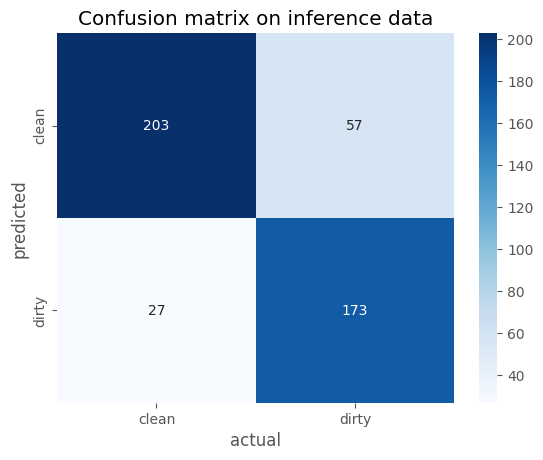

In [15]:
import seaborn as sns

confusion_matrix = pd.crosstab(inference_results["predicted"], inference_results["actual"])
sns.heatmap(confusion_matrix, cmap="Blues", annot=True, fmt="d")

plt.title("Confusion matrix on inference data")
plt.show()

- We reiterate the fact that our model has difficulty generalizing its learning on unknown data, the accuracy is ~67.14% (vs. ~88% during training)
- Moreover, we are far from our goal of minimizing the number of unreported full garbage cans (57/230)